In [1]:
# update statsmodels model and install arch at the same time
!pip install -U arch statsmodels

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# get data from Yahoo finance
df = yf.download('BTC-USD', start='2020-01-01')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1357 entries, 2020-01-01 to 2023-09-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1357 non-null   float64
 1   High       1357 non-null   float64
 2   Low        1357 non-null   float64
 3   Close      1357 non-null   float64
 4   Adj Close  1357 non-null   float64
 5   Volume     1357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 74.2 KB


### Exogenous Regressor

In [5]:
# get data from Yahoo finance
df_GLD = yf.download('GLD', start='2020-01-01')
df_GLD.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,143.860001,144.210007,143.399994,143.949997,143.949997,7733800
2020-01-03,145.750000,146.320007,145.399994,145.860001,145.860001,12272800
2020-01-06,148.440002,148.479996,146.949997,147.389999,147.389999,14403300
2020-01-07,147.570007,148.139999,147.429993,147.970001,147.970001,7978500
2020-01-08,148.490005,148.610001,146.139999,146.860001,146.860001,22248500


In [6]:
# info
df_GLD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 933 entries, 2020-01-02 to 2023-09-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       933 non-null    float64
 1   High       933 non-null    float64
 2   Low        933 non-null    float64
 3   Close      933 non-null    float64
 4   Adj Close  933 non-null    float64
 5   Volume     933 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 51.0 KB


### THE EXOGENOUS VARIABLES SHOULD BE STATIONARY

In [7]:
df_GLD['GLD_Log_Ret'] = np.log(df_GLD['Close']).diff()
df_GLD.head()

,Open,High,Low,Close,Adj Close,Volume,GLD_Log_Ret
Date,,,,,,,
2020-01-02,143.860001,144.210007,143.399994,143.949997,143.949997,7733800,NaN
2020-01-03,145.750000,146.320007,145.399994,145.860001,145.860001,12272800,0.013181
2020-01-06,148.440002,148.479996,146.949997,147.389999,147.389999,14403300,0.010435
2020-01-07,147.570007,148.139999,147.429993,147.970001,147.970001,7978500,0.003927
2020-01-08,148.490005,148.610001,146.139999,146.860001,146.860001,22248500,-0.007530


In [8]:
# drop the first row
df_GLD = df_GLD.iloc[1:].copy()
df_GLD.head()

,Open,High,Low,Close,Adj Close,Volume,GLD_Log_Ret
Date,,,,,,,
2020-01-03,145.750000,146.320007,145.399994,145.860001,145.860001,12272800,0.013181
2020-01-06,148.440002,148.479996,146.949997,147.389999,147.389999,14403300,0.010435
2020-01-07,147.570007,148.139999,147.429993,147.970001,147.970001,7978500,0.003927
2020-01-08,148.490005,148.610001,146.139999,146.860001,146.860001,22248500,-0.007530
2020-01-09,146.070007,146.410004,145.440002,146.029999,146.029999,10292300,-0.005668


In [9]:
# plot
px.line(df_GLD, x=df_GLD.index, y='GLD_Log_Ret')

In [10]:
# standardization(GLD)
m = df_GLD['GLD_Log_Ret'].mean()
s = df_GLD['GLD_Log_Ret'].std()
df_GLD['Scaled_GLD_Log_Ret'] = (df_GLD['GLD_Log_Ret'] - m) / s

In [11]:
# plot
px.line(df_GLD, x=df_GLD.index, y=df_GLD['Scaled_GLD_Log_Ret'])

In [12]:
# Log Return
df['Log_Ret'] = np.log(df['Close']).diff()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Ret
Date,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,-0.030273
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0.050172
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.008915
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.000089


In [13]:
# drop the first row
df = df.iloc[1:].copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Ret
Date,,,,,,,
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,-0.030273
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0.050172
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.008915
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.000089
2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598,0.047161


In [14]:
# plot
px.line(df, x=df.index, y='Log_Ret')

In [15]:
# compute the square of the log return
df['Sq_Log_Ret'] = df['Log_Ret'] ** 2

In [16]:
# plot the square of the log return
px.line(df, x=df.index, y='Sq_Log_Ret')

### ACF and PACF of the Log Return

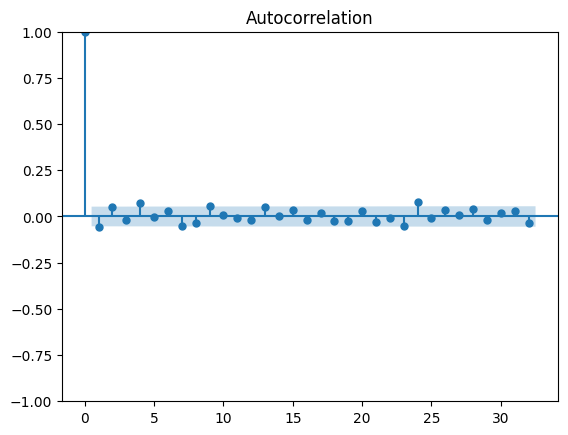

In [17]:
plot_acf(df['Log_Ret']);

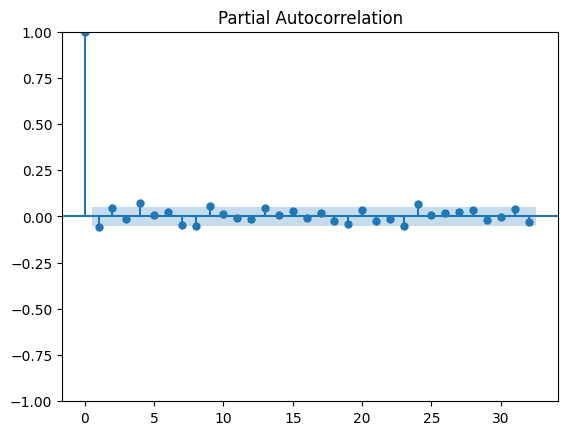

In [18]:
plot_pacf(df['Log_Ret']);

### ACF and PACF of the Squared Log Return

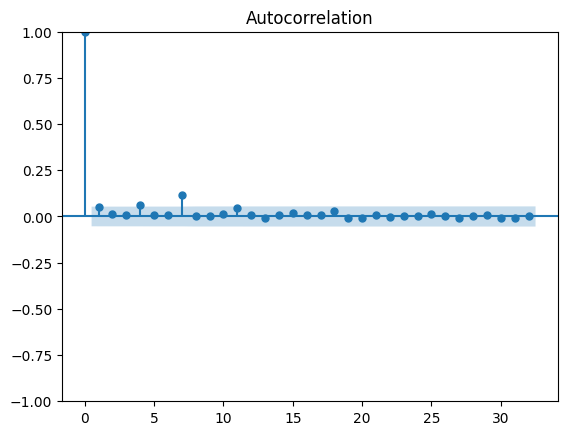

In [19]:
plot_acf(df['Sq_Log_Ret']);

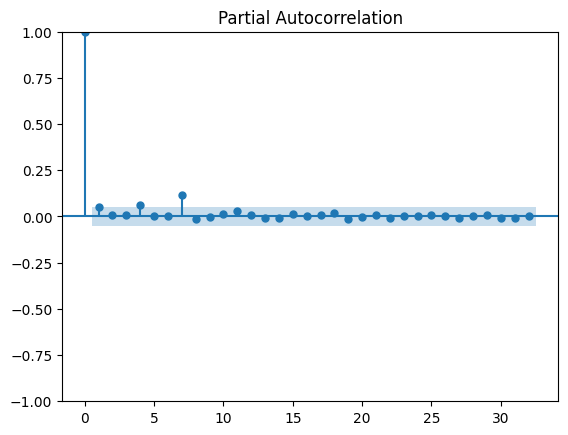

In [20]:
plot_pacf(df['Sq_Log_Ret']);

In [21]:
# train test split
Ntest = 10
train = df.iloc[:-Ntest][['Log_Ret']].copy()
test = df.iloc[-Ntest:][['Log_Ret']].copy()

In [22]:
# standardization
m = train['Log_Ret'].mean()
s = train['Log_Ret'].std()
train['Scaled_Log_Ret'] = (train['Log_Ret'] - m) / s

m = test['Log_Ret'].mean()
s = test['Log_Ret'].std()
test['Scaled_Log_Ret'] = (test['Log_Ret'] - m) / s

m = df['Log_Ret'].mean()
s = df['Log_Ret'].std()
df['Scaled_Log_Ret'] = (df['Log_Ret'] - m) / s

In [23]:
# plot
px.line(df, x=df.index, y='Scaled_Log_Ret')

### ACF and PACF of GLD's Close

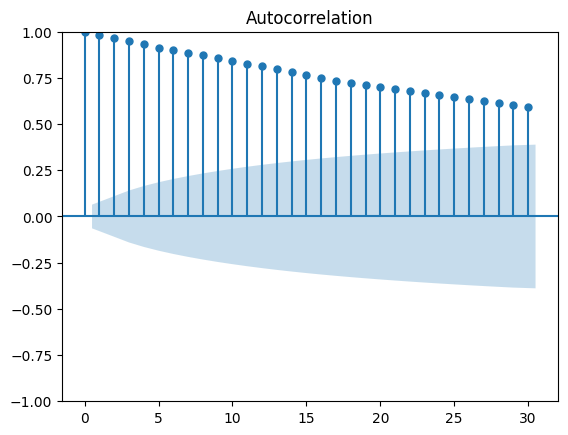

In [24]:
plot_acf(df_GLD['Close']);

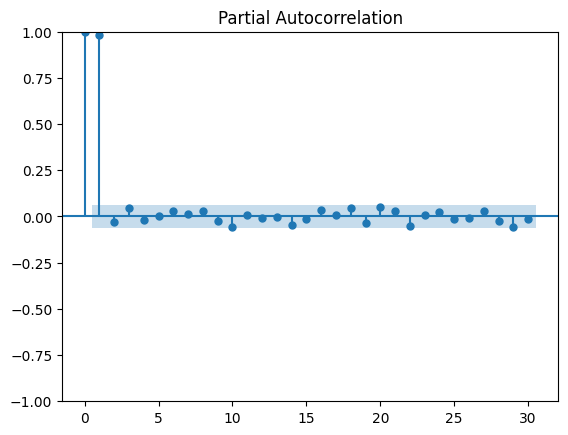

In [25]:
plot_pacf(df_GLD['Close']);

In [26]:
# craete our model
# y: The dependent variable
# x: Exogenous regressors
# mean: Name of the mean model
# lags: Either a scalar integer value indicating lag length or a list of integers specifying lag locations
# vol: Name of the volatility model
# p: Lag order of the symmetric innovation
# q: Lag order of lagged volatility or equivalent
# dist: Name of the error distribution('normal', 'StudentsT')
model = arch_model(train['Scaled_Log_Ret'], x=df_GLD['Scaled_GLD_Log_Ret'], mean='AR', lags=1, vol='GARCH', p=1, q=1, dist='StudentsT')

In [27]:
# fit the model
res = model.fit(update_freq=10)

Iteration:     10,   Func. Count:     83,   Neg. LLF: 1666.0629732832406
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1650.264092074282
            Iterations: 17
            Function evaluations: 132
            Gradient evaluations: 17


In [28]:
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:               Scaled_Log_Ret   R-squared:                       0.003
Mean Model:                              AR   Adj. R-squared:                  0.002
Vol Model:                            GARCH   Log-Likelihood:               -1650.26
Distribution:      Standardized Student's t   AIC:                           3312.53
Method:                  Maximum Likelihood   BIC:                           3343.75
                                              No. Observations:                 1345
Date:                      Mon, Sep 18 2023   Df Residuals:                     1343
Time:                              06:31:15   Df Model:                            2
                                    Mean Model                                   
=================================================================================
                     coef    std err          t      P>|t|       95.0% Conf. Int.
---------------------------------------------------------------------------------
Const         -5.7026e-03  1.649e-02     -0.346      0.730 [-3.803e-02,2.662e-02]
Scal...Ret[1]     -0.0580  2.305e-02     -2.518  1.179e-02   [ -0.103,-1.287e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0132  1.281e-02      1.033      0.301 [-1.187e-02,3.833e-02]
alpha[1]       0.0758  2.008e-02      3.776  1.595e-04    [3.647e-02,  0.115]
beta[1]        0.9242  2.632e-02     35.119 3.411e-270      [  0.873,  0.976]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.0335      0.213     14.214  7.485e-46 [  2.615,  3.452]
========================================================================

Covariance estimator: robust
"""

In [29]:
# in sample forecast
df['InSampleForecast'] = res.conditional_volatility

In [30]:
# plot
px.line(df, x=df.index, y=['Scaled_Log_Ret', 'InSampleForecast'])

In [31]:
# start date to forecast
start = df.index[-Ntest-1]
start

Timestamp('2023-09-08 00:00:00')

In [32]:
# out of sample forecast
out_sam_forecast = res.forecast(horizon=Ntest, reindex=False, start= start)
out_sam_forecast

In [33]:
# variance
out_sam_forecast.variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
Date,,,,,,,,,,
2023-09-08,0.473619,0.488447,0.501729,0.515007,0.528284,0.541561,0.554838,0.568115,0.581393,0.59467


In [34]:
# residual_variance
out_sam_forecast.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
Date,,,,,,,,,,
2023-09-08,0.473619,0.486852,0.500084,0.513317,0.526549,0.539782,0.553014,0.566247,0.579479,0.592712


In [35]:
# forecast values
forecast = out_sam_forecast.variance.to_numpy().flatten()
forecast.shape

(10,)

In [36]:
# Boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [37]:
# out of sample forecast
df.loc[test_idx, 'OutSampleForecast'] = forecast

In [38]:
# plot
px.line(df, x=df.index, y=['Scaled_Log_Ret', 'InSampleForecast', 'OutSampleForecast'])

In [39]:
# absolute value
df['Abs_Scaled_Log_Ret'] = df['Scaled_Log_Ret'].abs()

In [40]:
# plot
px.line(df, x=df.index, y=['Abs_Scaled_Log_Ret', 'InSampleForecast', 'OutSampleForecast'])